# Data Exploration / Exploratory Data Analysis Lab

Analyzing a Kaggle dataset

Start with our normal imports and making sure we can see our plots inline...

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
!ls data/kaggle-sales/

item_categories.csv   sales_train.csv       shops.csv
items.csv             sample_submission.csv test.csv


Read the following files into DataFrames:

- `./data/kaggle-sales/sales_train.csv` 
- `./data/kaggle-sales/items.csv`

In [12]:
sales = pd.read_csv('./data/kaggle-sales/sales_train.csv')
items = pd.read_csv('./data/kaggle-sales/items.csv')

Examine the structure of each of the DataFrames

In [13]:
sales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [14]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

Add the category of each item sold to the sales DataFrame (you may want to look at `pd.merge`)

In [15]:
sales = pd.merge(sales, items, on='item_id')
sales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  23.01.2013               0       24    22154       999.0           1.0   
2  20.01.2013               0       27    22154       999.0           1.0   
3  02.01.2013               0       25    22154       999.0           1.0   
4  03.01.2013               0       25    22154       999.0           1.0   

           item_name  item_category_id  
0  ЯВЛЕНИЕ 2012 (BD)                37  
1  ЯВЛЕНИЕ 2012 (BD)                37  
2  ЯВЛЕНИЕ 2012 (BD)                37  
3  ЯВЛЕНИЕ 2012 (BD)                37  
4  ЯВЛЕНИЕ 2012 (BD)                37

The date is not formatted as a datetime. Here I'll change its type:

In [16]:
sales['date'] = pd.to_datetime(sales['date'])

In [17]:
sales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-02-01               0       59    22154       999.0           1.0   
1 2013-01-23               0       24    22154       999.0           1.0   
2 2013-01-20               0       27    22154       999.0           1.0   
3 2013-02-01               0       25    22154       999.0           1.0   
4 2013-03-01               0       25    22154       999.0           1.0   

           item_name  item_category_id  
0  ЯВЛЕНИЕ 2012 (BD)                37  
1  ЯВЛЕНИЕ 2012 (BD)                37  
2  ЯВЛЕНИЕ 2012 (BD)                37  
3  ЯВЛЕНИЕ 2012 (BD)                37  
4  ЯВЛЕНИЕ 2012 (BD)                37

Add a column for the total sales (price * cnt) for each item on each day

In [18]:
sales['sales_total'] = sales.item_price * sales.item_cnt_day

Use a `groupby` operation on `date` to generate total sales (across all items) for each day

In [19]:
daily_sales = sales.groupby('date').sales_total.sum()
daily_sales.head()

date
2013-01-01    1362942.00
2013-01-02    2536633.00
2013-01-03    2518542.40
2013-01-04    1823273.00
2013-01-05    2727292.98
Name: sales_total, dtype: float64

Plot daily sales

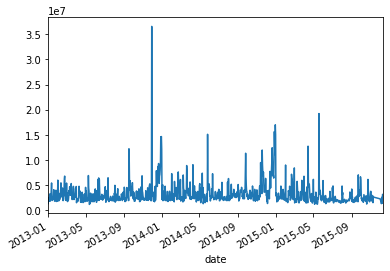

In [21]:
daily_sales.plot();

Let's try grouping sales by category, rather than by date. How much money was made in each category?

In [25]:
category_sales = sales.groupby('item_category_id').sales_total.sum()
category_sales.head()

item_category_id
0         263.40
1         431.00
2    43564473.62
3    62553530.39
4     1332176.52
Name: sales_total, dtype: float64

Now let's do a `sns.distplot` to see how our many categories have large sales figures

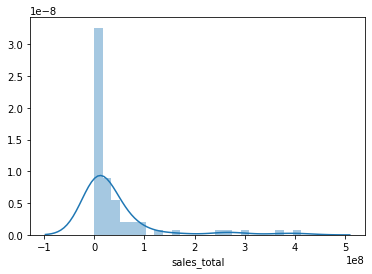

In [28]:
sns.distplot(category_sales)

Generate a new `filtered_category_sales` dataframe containing only categories with more than `1e8` in sales

In [33]:
filtered_category_sales = category_sales[category_sales > 1e8]
filtered_category_sales

item_category_id
12    2.922398e+08
19    4.120503e+08
20    3.730103e+08
23    2.596191e+08
28    1.364191e+08
30    2.575193e+08
40    1.699442e+08
55    1.000226e+08
Name: sales_total, dtype: float64

Plot the filtered category sales as a bar chart (`pd.Series` has a `.plot.bar()`)

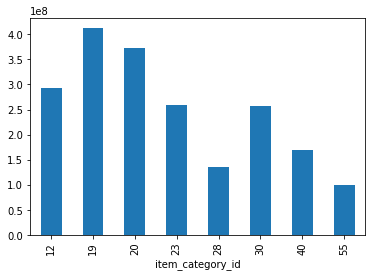

In [34]:
filtered_category_sales.plot.bar()

Generate a scatterplot showing how item price correlates with the number of sales (you will need to group by item first)

In [42]:
item_sales = sales.groupby('item_id').sum()
item_sales.head()

date_block_num  shop_id  item_price  item_cnt_day  item_category_id  \
item_id                                                                        
0                    20       54        58.0           1.0                40   
1                   108      330     26940.0           6.0               456   
2                    41      108       116.0           2.0                80   
3                    37      108       158.0           2.0                80   
4                    20       54        58.0           1.0                40   

         sales_total  
item_id               
0               58.0  
1            26940.0  
2              116.0  
3              158.0  
4               58.0

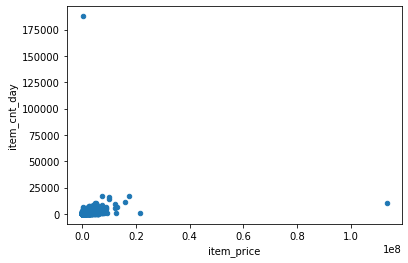

In [43]:
item_sales.plot.scatter('item_price', 'item_cnt_day')

Repeat the plot above, but remove any item where its item_cnt_day or item_price is more than 2 standard deviations from the mean

In [44]:
item_sales.describe()

date_block_num        shop_id    item_price  item_cnt_day  \
count    21807.000000   21807.000000  2.180700e+04   21807.00000   
mean      1961.528867    4442.981199  1.199345e+05     167.29518   
std       6770.235151   13073.692720  9.306642e+05    1366.22019   
min          0.000000       0.000000  7.000000e+00     -11.00000   
25%         50.000000     217.000000  2.330000e+03       7.00000   
50%        304.000000    1090.000000  1.230000e+04      33.00000   
75%       1534.500000    3985.000000  5.196170e+04     124.00000   
max     554196.000000  991373.000000  1.132643e+08  187642.00000   

       item_category_id   sales_total  
count      2.180700e+04  2.180700e+04  
mean       5.385336e+03  1.558640e+05  
std        2.036547e+04  1.696693e+06  
min        0.000000e+00 -2.858900e+04  
25%        2.880000e+02  2.394500e+03  
50%        1.400000e+03  1.276300e+04  
75%        4.896000e+03  5.489823e+04  
max        2.225140e+06  2.193915e+08

In [49]:
count_cutoff = item_sales.item_cnt_day.mean() + 2 * item_sales.item_cnt_day.std()
price_cutoff = item_sales.item_price.mean() + 2 * item_sales.item_price.std()

filtered_item_sales = item_sales[
    (item_sales.item_cnt_day < count_cutoff)
    & (item_sales.item_price < price_cutoff)
]

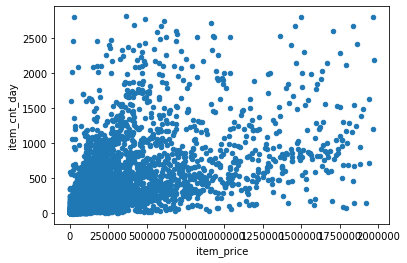

In [50]:
filtered_item_sales.plot.scatter('item_price', 'item_cnt_day')

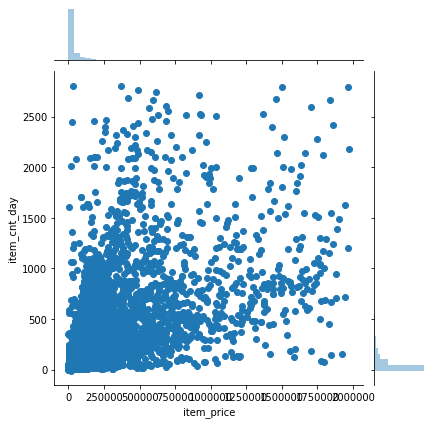

In [52]:
sns.jointplot(filtered_item_sales.item_price, filtered_item_sales.item_cnt_day)